# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2024s/tree/main/lectures) 
**See PrairieLearn for _due date_ and _submission instructions_**


Imports
------

In [1]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions

_Points: 3_

Follow the [CPSC 330 homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md), and the summary at the end of this HW.


<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
_Points: 2_

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [2]:
spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.shape
spotify_df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


<br><br>

### 1.2 Number of training and test examples

_Points: 2_

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]

<div class="alert alert-warning">

Solution_1.2
    
</div>

In [4]:
print(f"train examples = {n_train_samples}")
print(f"test examples = {n_test_samples}")

train examples = 1613
test examples = 404


<br><br>

#### 1.3

_Points: 3_

**Your tasks:**

1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

In [5]:
desc = train_df.describe()
desc.head(8)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [6]:
range_row = desc.loc['max'] - desc.loc['min']
desc.loc['range'] = range_row
desc.head(9)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000
range,0.993997,0.836000,9.885850e+05,0.981400,0.976000,11.000000,0.950200,30.364000,1.000000,0.598900,171.472000,4.000000,0.936700,1.000000


In [7]:
min_value = range_row.min()
print(min_value)

0.5989


feature with smalles range is Speechiness

<br><br>

### 1.4 Plotting histograms 

_Points: 5_

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

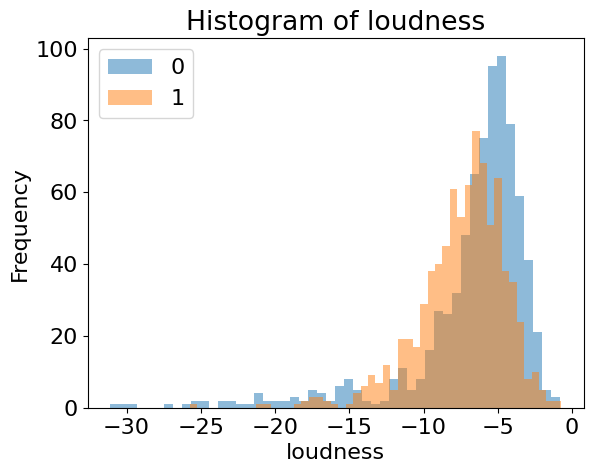

In [8]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

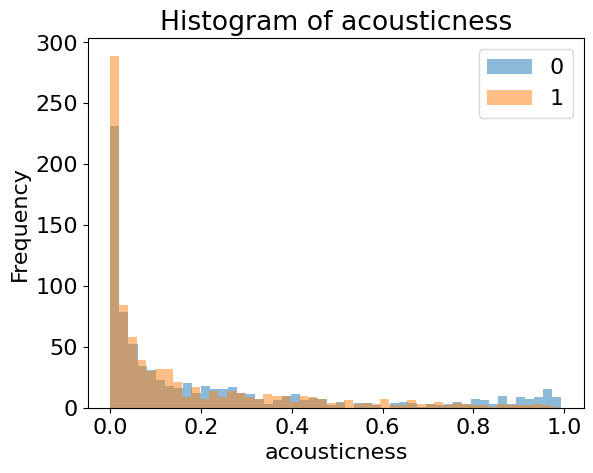

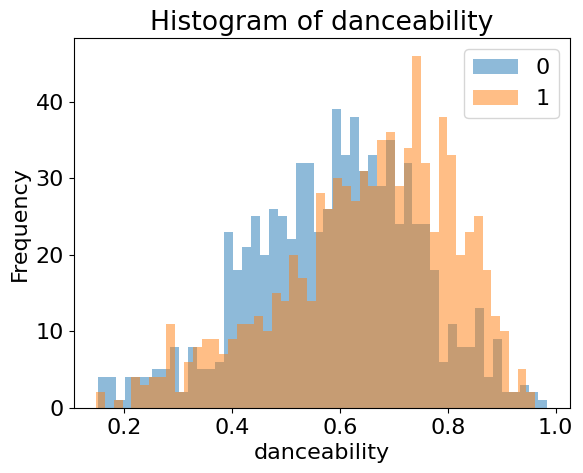

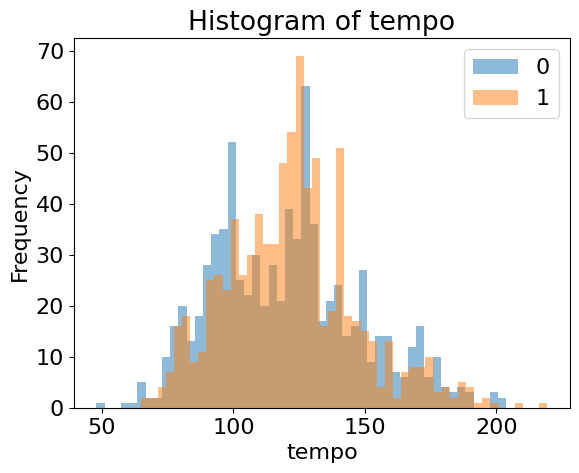

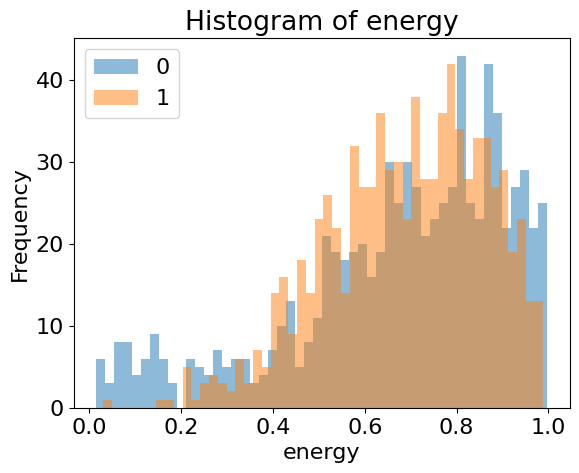

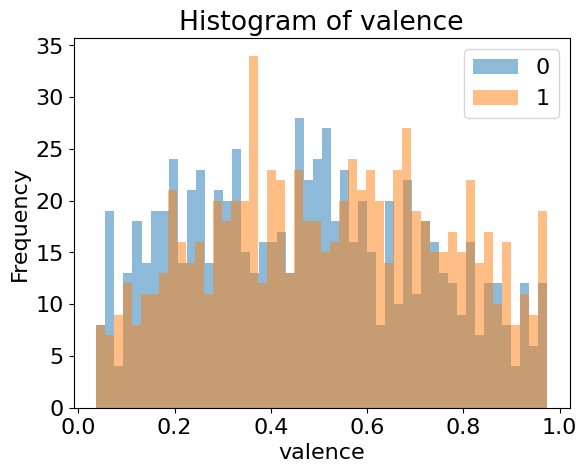

In [9]:
feats = ["acousticness", "danceability", "tempo", "energy", "valence"]
for feat in feats:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

<br><br>

### 1.5 Identical histograms

_Points: 3_

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

Identical histograms mean feature values are distributed similarly for both target classes. 
Hence, feature does not provide discriminatory power for predicting target class.

<br><br>

### 1.6 Which columns to include? 

_Points: 4_

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

I do not know how `song_title` could be used.
- Using song titles might introduce a lot of noise since they may not always be related to the song's genre. Additionally, processing song titles as text data requires complex transformations, making it harder to use effectively.
- From personal experience, I usually pay little attention to a song's title; it's only after I've heard the song that I actually remember its title. This makes song titles less useful for predicting the song's genre in a machine learning algorithm
- While it's possible to use techniques like one-hot encoding, this approach would significantly increase the dataset's dimensionality since each song title is likely to be very unique.

`artist`, if users have consistent preference for specific artists, then this feature does capture that preference. 
- to use this feature we would need to convert it into a numerical feature
- Using one-hot encoding will increase dimensionality, but not as much as it would for the song title feature, since several artists are likely to be repeated in this column.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1

_Points 2_

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [10]:
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]
X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

<br><br>

### 2.2

_Points: 2_

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

In [11]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)
spotify_tree.score(X_train, y_train)

0.9987600743955363

<br><br>

### 2.3 

_Points: 2_

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

In [12]:
pred = spotify_tree.predict(X_train.iloc[0:1])
print(pred)
print(y_train.iloc[0])
pred == y_train.iloc[0]

[1]
1


array([ True])

<br><br>

### 2.4

_Points: 2_

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

In [13]:
cv_scores = cross_val_score(spotify_tree, X_train, y_train, cv=10)
print(cv_scores)
mean_cv_score = np.mean(cv_scores)
mean_cv_score

[0.68518519 0.63580247 0.64197531 0.70807453 0.72670807 0.60869565
 0.71428571 0.71428571 0.67701863 0.70807453]


0.6820105820105821

<br><br>

### 2.5

_Points: 3_

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

In [14]:
scores_df = cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
scores_df = pd.DataFrame(scores_df)
scores_df.head(10)

,fit_time,score_time,test_score,train_score
0,0.017407,0.001878,0.685185,0.999311
1,0.017977,0.001821,0.635802,0.998622
2,0.014504,0.001822,0.641975,0.999311
3,0.017484,0.001823,0.708075,0.998623
4,0.016896,0.001696,0.726708,0.998623
5,0.017054,0.001550,0.608696,0.998623
6,0.015017,0.001734,0.714286,0.998623
7,0.016954,0.001709,0.714286,0.999311
8,0.016420,0.001835,0.677019,0.999311
9,0.017269,0.001806,0.708075,0.998623


In [15]:
test_scores_std = scores_df['test_score'].std()
print("Standard Deviation of Test Scores:", test_scores_std)

Standard Deviation of Test Scores: 0.040260240614515684


<br><br>

### 2.6

_Points: 2_

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

1. Smaller variation between the sub-scores indicates higher trustworthiness of the mean cross-validation score. This applies to both train_scores and test_scores. A standard deviation of ±0.04 from the mean is relatively low; while lower would be ideal, this value does not seem terrible at first glance.
2. Comparing training and cross-validation scores shows how well the model works on new data. If they're very different, it might mean the model is either too simple or too complex. For example, if it predicts ~70% correctly on average with unseen data but almost ~99% on training data, it suggests the model could be improved, which is what I am seeing in this model.

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1

_Points: 10_

**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [16]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_3.1
    
</div>

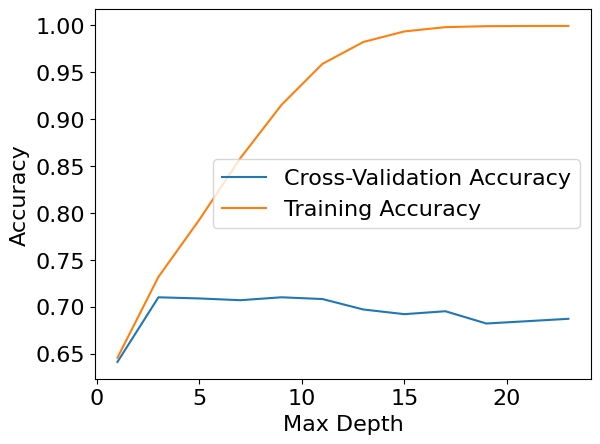

In [17]:
mean_test_scores = []
mean_train_scores = []
for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    cv = cross_validate(classifier, X_train, y_train, cv=10, return_train_score=True)
    mean_test_scores.append(np.mean(cv["test_score"]))
    mean_train_scores.append(np.mean(cv["train_score"]))

max_depth_plot, ax = plt.subplots()
ax.plot(depths, mean_test_scores, label='Cross-Validation Accuracy')
ax.plot(depths, mean_train_scores, label='Training Accuracy')

ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy")
ax.legend()


<br><br>

### 3.2 `max_depth` and the fundamental tradeoff

_Points: 2_

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

Training Accuracy: When the max_depth of a decision tree is increased, the model can become very complex and start to memorize the training data, including any random noise or outliers. This results in very high or perfect accuracy on the training data because the model fits the data exactly, including the noise.
- For my model, the accuracy curve continues to rise until it reaches 1.

Cross-Validation Accuracy: Initially, as max_depth increases, the model may improve because it is capturing genuine patterns. However, beyond a certain point, the model starts to overfit, meaning it fits the noise in the training data rather than the underlying trends. This causes the model to perform poorly on new, unseen data because the noise patterns it learned from the training data do not generalize.
- For my model, the accuracy starts to decline after reaching a `max_depth` of 3.

<br><br>

### 3.3 Picking a reasonable value for `max_depth`

_Points: 2_

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [18]:
best_max_depth = depths[1]
best_max_depth

3

<br><br>

### 3.4 Final assessment on the test set

_Points: 3_

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**
1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

In [19]:
test_score = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_test, y_test).score(X_test, y_test)
test_score

0.7599009900990099

<br><br>

### 3.5 Analysis

_Points: 5_

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

1. The test score is approximately 76%, which is higher than any of the cross-validation scores I previously obtained. The highest cross-validation score I observed was around 72%. I'm unsure why there is this discrepancy. Typically, I would expect the test score on unseen X_test data to be closer to the cross-validation score achieved with the optimal max depth.
2. Simply picking the value of max_depth that gives the best accuracy on the training data may lead to overfitting. This is because selecting the maximum accuracy on the training data alone may result in a model that memorizes the training set without generalizing well to unseen data. Cross-validation is necessary to ensure that the model's performance is robust and can generalize to new data.
3. It's uncertain whether the chosen `max_depth` would generalize well to other "spotify" datasets without further validation. The generalizability of the `max_depth` parameter depends on the similarity of the datasets in terms of features, distribution, and underlying patterns. Conducting experiments and validation on multiple datasets would provide a better understanding of its generalizability.

<br><br><br><br>

## Exercise 4: Conceptual questions

_Points: 3_

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

1. for examples less than 5.5, we would predict false with accuracy of 2/3. for examples greater than 5.5, we would predict true with accuracy 3/3. 
2. Overall this model would have score 5/6 or 83.33%
3. It is not possible to achieve 100% accuracy with a single decision stump for this dataset, as no single split perfectly separates the classes.

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.